Actividad Limpieza de base de datos - Bike buyers

Mario Alberto Perez Barrera - A01799928

Marco Antonio Gonzalez Fernandez - A01799122

ETAPA DE INSPECCION

In [169]:
#Importar las librerias necesarias
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Cargar el archivo CSV
df = pd.read_csv('bike_buyers.csv')

In [170]:
# Inspección inicial
print("Primeras filas del conjunto de datos:")
df.head()

Primeras filas del conjunto de datos:


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12591,Married,Female,"30,000",4.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,45.0,No
1,14058,Single,Male,"70,000",0.0,Bachelors,Professional,No,1.0,5-10 Miles,Pacific,41.0,Yes
2,23962,Married,Female,"10,000",0.0,Partial High School,Manual,Yes,2.0,1-2 Miles,Europe,32.0,No
3,23419,Single,Female,"70,000",5.0,Bachelors,Professional,Yes,3.0,10+ Miles,Pacific,39.0,No
4,21940,Married,Male,"90,000",5.0,Graduate Degree,Professional,Yes,0.0,0-1 Miles,North America,47.0,Yes


In [171]:
#Lectura de la informacion de la base de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1251 non-null   int64  
 1   Marital Status    1244 non-null   object 
 2   Gender            1238 non-null   object 
 3   Income            1243 non-null   object 
 4   Children          1238 non-null   float64
 5   Education         1251 non-null   object 
 6   Occupation        1251 non-null   object 
 7   Home Owner        1247 non-null   object 
 8   Cars              1242 non-null   float64
 9   Commute Distance  1251 non-null   object 
 10  Region            1251 non-null   object 
 11  Age               1238 non-null   float64
 12  Purchased Bike    1251 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 127.2+ KB


In [172]:
#Resumen estadístico de el DataFrame.
df.describe()

,ID,Children,Cars,Age
count,1251.000000,1238.000000,1242.000000,1238.000000
mean,20030.208633,1.929725,1.479066,44.058966
std,5331.451777,1.638977,1.121885,11.271138
min,11000.000000,0.000000,0.000000,25.000000
25%,15465.000000,0.000000,1.000000,35.000000
50%,19731.000000,2.000000,1.000000,43.000000
75%,24549.000000,3.000000,2.000000,52.000000
max,29447.000000,5.000000,4.000000,89.000000


In [173]:
# Revisión de valores faltantes
print(df.isnull().sum())

ID                   0
Marital Status       7
Gender              13
Income               8
Children            13
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                 13
Purchased Bike       0
dtype: int64


In [174]:
#Revisar si alguna columna numérica se cargó como 'object'
print(df.dtypes)

ID                    int64
Marital Status       object
Gender               object
Income               object
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object


ETAPA DE LIMPIEZA

In [175]:
#Identificación de datos fuera del rango esperado
#La columna 'Age' tiene un rango de 0 a 100

print(df[df['Age'] < 0])  # Ver si hay edades negativas
print(df[df['Age'] > 100])  # Ver si hay edades inusualmente altas

Empty DataFrame
Columns: [ID, Marital Status, Gender, Income, Children, Education, Occupation, Home Owner, Cars, Commute Distance, Region, Age, Purchased Bike]
Index: []
Empty DataFrame
Columns: [ID, Marital Status, Gender, Income, Children, Education, Occupation, Home Owner, Cars, Commute Distance, Region, Age, Purchased Bike]
Index: []


In [176]:
# Transformar columnas numéricas que están como 'object', eliminando comas si es necesario
df['Income'] = pd.to_numeric(df['Income'].str.replace(',', ''), errors='coerce')

In [177]:
# Verificar que los tipos de datos ahora sean correctos

print(df.dtypes)

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object


In [178]:
# Si hay duplicados, eliminarlos
df = df.drop_duplicates()

In [179]:
df['Children'] = df['Children'].fillna(df['Children'].median())

In [180]:
# Rellenar valores faltantes con la mediana en las columnas numéricas
df['Children'] = df['Children'].fillna(df['Children'].median())
df['Cars'] = df['Cars'].fillna(df['Cars'].median())

# Si hay valores faltantes en otras columnas categóricas, rellenarlos con el valor más frecuente
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Home Owner'] = df['Home Owner'].fillna(df['Home Owner'].mode()[0])
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])
df['Income'] = df['Income'].fillna(df['Income'].mode()[0])
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])


In [181]:
# Verificar nuevamente si existen valores faltantes
print(df.isnull().sum())

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64


In [182]:
# Guardar los datos limpios en un nuevo archivo CSV
df.to_csv('datos_limpiados.csv', index=False)


ETAPA DE ANALISIS DE DATOS

In [183]:
#Lectura del nuevo archivo
df = pd.read_csv('datos_limpiados.csv')

<Axes: ylabel='Density'>

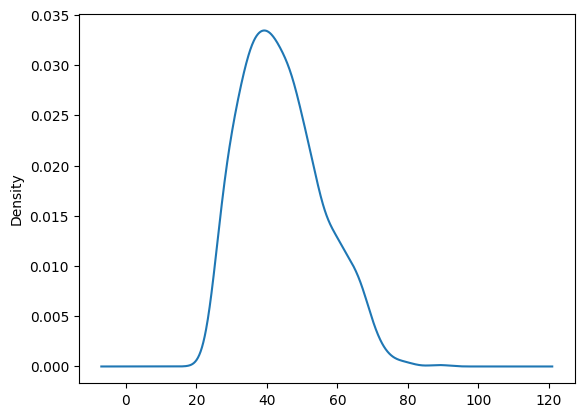

In [184]:
#Estimación de Densidad Kernel (KDE) para la columna "Age"
df["Age"].plot.kde()

<Axes: ylabel='Frequency'>

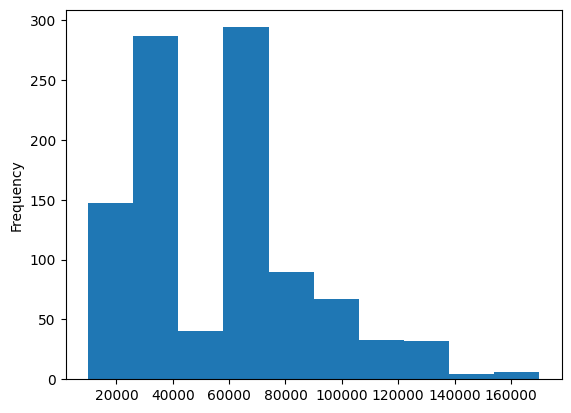

In [185]:
# Histograma de la columna Income
df["Income"].plot.hist()

<Axes: ylabel='Density'>

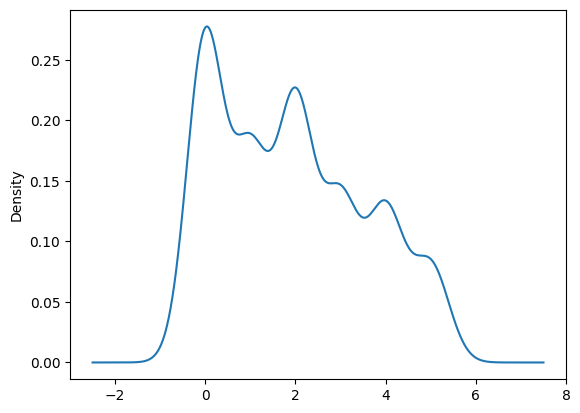

In [186]:
#Estimación de Densidad Kernel (KDE) para la columna "Children"
df["Children"].plot.kde()